# 이미지 증강

In [6]:
#!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-01-09 05:26:02--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  12.7MB/s    in 5.4s    

2023-01-09 05:26:08 (12.2 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [7]:
#!unzip /content/cats_and_dogs_filtered.zip

Archive:  /content/cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
data_root = '/content/cats_and_dogs_filtered'

In [10]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img = image.load_img('/content/cats_and_dogs_filtered/train/cats/cat.0.jpg')
type(img)

PIL.JpegImagePlugin.JpegImageFile

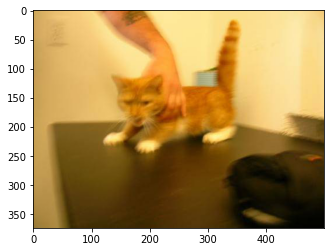

In [11]:
plt.imshow(img)

In [12]:
x = image.img_to_array(img)
print(x.shape)
print(type(x)) # 전체 타입 확인

(374, 500, 3)
<class 'numpy.ndarray'>


In [13]:
print(x.dtype) # 하나하나 원소의 타입을 확인한다.

float32


In [23]:
x = x.astype('int').reshape((1, 374, 500, 3))
x.shape

(1, 374, 500, 3)

In [24]:
x[:5]

array([[[[203, 164,  87],
         [203, 164,  87],
         [204, 165,  88],
         ...,
         [240, 201, 122],
         [239, 200, 121],
         [238, 199, 120]],

        [[203, 164,  87],
         [203, 164,  87],
         [204, 165,  88],
         ...,
         [241, 202, 123],
         [240, 201, 122],
         [238, 199, 120]],

        [[203, 164,  87],
         [203, 164,  87],
         [204, 165,  88],
         ...,
         [241, 202, 123],
         [240, 201, 122],
         [239, 200, 121]],

        ...,

        [[153, 122,  55],
         [153, 122,  55],
         [153, 122,  55],
         ...,
         [  2,   2,   0],
         [  2,   2,   0],
         [  2,   2,   0]],

        [[152, 121,  54],
         [152, 121,  54],
         [152, 121,  54],
         ...,
         [  2,   2,   0],
         [  2,   2,   0],
         [  2,   2,   0]],

        [[151, 120,  53],
         [151, 120,  53],
         [151, 120,  53],
         ...,
         [  1,   1,   0],
        

In [25]:
gen = ImageDataGenerator(
    rotation_range = 90,
    width_shift_range = 0.4,
    height_shift_range = 0.4,
    vertical_flip = True,
    horizontal_flip = True
)

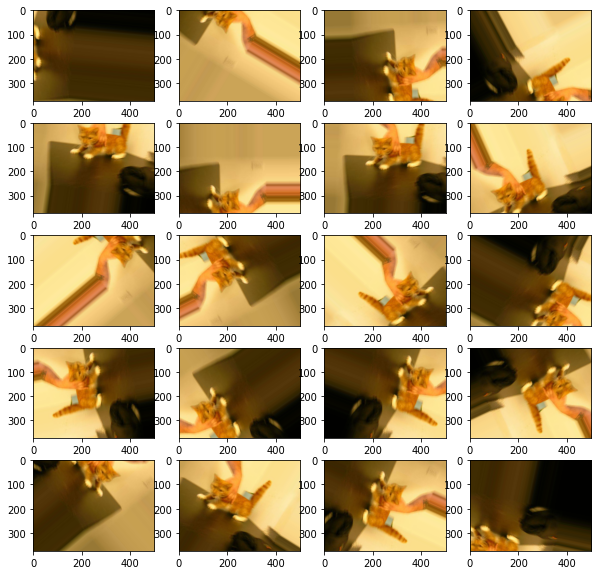

In [27]:
idx = 0
axs = []
fig = plt.figure(figsize = (10, 10))
for batch in gen.flow(x, batch_size=1):
  axs.append(fig.add_subplot(5, 4, idx+1))
  axs[idx].imshow(image.array_to_img(batch[0]))
  idx = idx + 1
  if idx%20 == 0:
    break
plt.show()

In [28]:
import os

train_dir = os.path.join(data_root, 'train')
val_dir = os.path.join(data_root, 'validation')

In [30]:
# 정규화도 같이 시킨다.
train_gen = ImageDataGenerator( 
    rescale = 1./255.,
    rotation_range = 90,
    width_shift_range = 0.4,
    height_shift_range = 0.4,
    vertical_flip = True,
    horizontal_flip = True
)

val_gen = ImageDataGenerator(rescale=1./255.)
# validation은 학습에 관여시키지 않으므로 rescale, 정규화만 시킨다.

In [31]:
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)

train_iter = train_gen.flow_from_directory(
    train_dir,
    batch_size = BATCH_SIZE,
    target_size = IMAGE_SIZE,
    class_mode = 'binary'
)

type(train_iter)

Found 2000 images belonging to 2 classes.


keras.preprocessing.image.DirectoryIterator

In [34]:
val_iter = val_gen.flow_from_directory(
  val_dir,
    batch_size = BATCH_SIZE,
    target_size = IMAGE_SIZE,
    class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


In [35]:
images, labels = train_iter.next()
len(images), len(labels)

(32, 32)

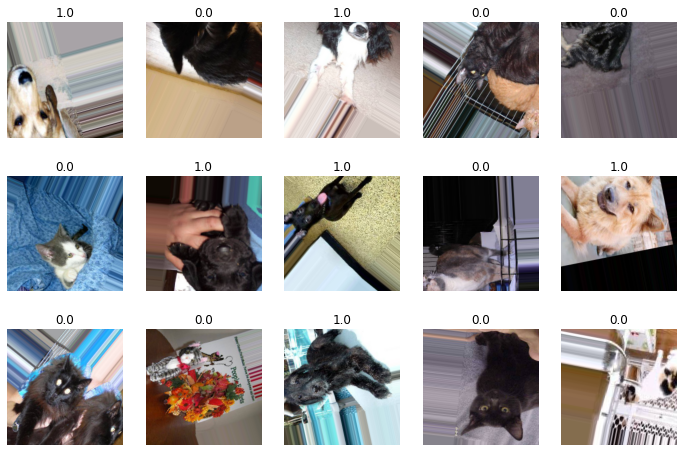

In [40]:
plt.figure(figsize = (12,8))
for i in range(15):
  plt.subplot(3,5, i+1)
  plt.axis('off')
  plt.imshow(images[i])
  plt.title(labels[i])
plt.show()

In [51]:
def build_model_4():
  model = keras.Sequential([
      layers.Conv2D(32, 3, activation='relu', padding = 'same', input_shape = (224, 224, 3)),
      # 32, (3, 3)이라고 적어도 됨. 32, 3하면 자동적으로 32, (3, 3)들어감.
      # padding ='same'은 입력된 이미지와 출력된 이미지의 크기를 같게해준다.
      layers.MaxPool2D(2),
      layers.Conv2D(64, 3, activation='relu', padding = 'same'),
      layers.MaxPool2D(2),
      layers.Conv2D(128, 3, activation='relu', padding = 'same'),
      layers.MaxPool2D(2),
      layers.Conv2D(128, 3, activation='relu', padding = 'same'),
      layers.MaxPool2D(2),
      layers.Flatten(),
      layers.Dropout(0.3),
      layers.Dense(256, activation='relu'),
      layers.Dense(1, activation='sigmoid')
  ])

  model.compile(
      optimizer = 'adam',
      loss = 'binary_crossentropy', # sparse_를 붙이면 y를 원핫인코딩을 하지 않아도 내부적으로 원핫인코딩을 하여 계산한다.
      metrics = ['acc']
       )
  
  return model

In [52]:
model = build_model_4()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 28, 28, 128)     

In [53]:
EPOCHS=30

log = model.fit(train_iter,
                epochs=EPOCHS,
                validation_data=val_iter,
                verbose=1)

Epoch 1/30
63/63 [==============================] - 35s 417ms/step - loss: 0.6883 - acc: 0.5410 - val_loss: 0.6702 - val_acc: 0.5710
Epoch 2/30
63/63 [==============================] - 26s 413ms/step - loss: 0.6805 - acc: 0.5630 - val_loss: 0.6511 - val_acc: 0.6100
Epoch 3/30
63/63 [==============================] - 26s 408ms/step - loss: 0.6676 - acc: 0.5630 - val_loss: 0.6928 - val_acc: 0.5000
Epoch 4/30
63/63 [==============================] - 26s 418ms/step - loss: 0.6796 - acc: 0.5460 - val_loss: 0.6726 - val_acc: 0.5580
Epoch 5/30
63/63 [==============================] - 26s 408ms/step - loss: 0.6755 - acc: 0.5645 - val_loss: 0.6461 - val_acc: 0.6170
Epoch 6/30
63/63 [==============================] - 26s 410ms/step - loss: 0.6750 - acc: 0.5560 - val_loss: 0.6839 - val_acc: 0.5340
Epoch 7/30
63/63 [==============================] - 26s 411ms/step - loss: 0.6666 - acc: 0.5545 - val_loss: 0.6572 - val_acc: 0.5800
Epoch 8/30
63/63 [==============================] - 26s 410ms/step - 

### 검증데이터 분리

In [60]:
from tensorflow.python.ops.gen_array_ops import tensor_strided_slice_update
# 정규화도 같이 시킨다.
train_gen = ImageDataGenerator( 
    rescale = 1./255.,
    rotation_range = 90,
    width_shift_range = 0.4,
    height_shift_range = 0.4,
    vertical_flip = True,
    horizontal_flip = True,
    validation_split = 0.2
)

test_gen = ImageDataGenerator(rescale=1./255.)

In [64]:
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)

# 위에서 validation_split으로 train을 나누었기 때문에, train_gen에 train, val 전부 포함되어있다.

train_iter = train_gen.flow_from_directory(
    train_dir,
    batch_size = BATCH_SIZE,
    target_size = IMAGE_SIZE,
    class_mode = 'binary',
    subset = 'training'
)

val_iter = train_gen.flow_from_directory(
    train_dir,
    batch_size = BATCH_SIZE,
    target_size = IMAGE_SIZE,
    class_mode = 'binary',
    subset = 'validation'
)

test_iter = test_gen.flow_from_directory(
    val_dir,
    batch_size = BATCH_SIZE,
    target_size = IMAGE_SIZE,
    class_mode = 'binary',
)

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [67]:
def build_model_2():
  model = keras.Sequential([
      layers.Conv2D(32, 3, activation='relu', input_shape = (224, 224, 3)),
      # 32, (3, 3)이라고 적어도 됨. 32, 3하면 자동적으로 32, (3, 3)들어감.
      # padding ='same'은 입력된 이미지와 출력된 이미지의 크기를 같게해준다.
      layers.MaxPool2D(2),
      layers.Conv2D(64, 3, activation='relu'),
      layers.MaxPool2D(2),
      layers.Conv2D(128, 3, activation='relu'),
      layers.MaxPool2D(2),
      layers.Conv2D(128, 3, activation='relu'),
      layers.MaxPool2D(2),
      layers.Flatten(),
      layers.Dropout(0.3),
      layers.Dense(256, activation='relu'),
      layers.Dense(1, activation='sigmoid')
  ])

  model.compile(
      optimizer = 'sgd',
      loss = 'binary_crossentropy', # sparse_를 붙이면 y를 원핫인코딩을 하지 않아도 내부적으로 원핫인코딩을 하여 계산한다.
      metrics = ['acc']
       )
  
  return model

In [68]:
EPOCHS = 10

log = model.fit(train_iter,
                epochs = EPOCHS,
                validation_data=val_iter)

Epoch 1/10
50/50 [==============================] - 21s 410ms/step - loss: 0.6474 - acc: 0.5906 - val_loss: 0.6225 - val_acc: 0.6300
Epoch 2/10
50/50 [==============================] - 20s 408ms/step - loss: 0.6502 - acc: 0.5962 - val_loss: 0.6225 - val_acc: 0.6300
Epoch 3/10
50/50 [==============================] - 21s 412ms/step - loss: 0.6434 - acc: 0.6069 - val_loss: 0.6339 - val_acc: 0.6100
Epoch 4/10
50/50 [==============================] - 21s 411ms/step - loss: 0.6538 - acc: 0.5875 - val_loss: 0.6175 - val_acc: 0.6350
Epoch 5/10
50/50 [==============================] - 21s 413ms/step - loss: 0.6471 - acc: 0.5950 - val_loss: 0.6270 - val_acc: 0.6200
Epoch 6/10
50/50 [==============================] - 21s 411ms/step - loss: 0.6576 - acc: 0.5856 - val_loss: 0.6599 - val_acc: 0.5700
Epoch 7/10
50/50 [==============================] - 20s 409ms/step - loss: 0.6566 - acc: 0.5863 - val_loss: 0.6266 - val_acc: 0.6050
Epoch 8/10
50/50 [==============================] - 21s 410ms/step - 

# ModelCheckpoint 콜백 적용

In [70]:
ckpt_path = '/ckpt/cats_bbs.ckpt'

ckpt_cb = tf.keras.callbacks.ModelCheckpoint(
    ckpt_path,
    save_weights_onlt=True,
    save_best_only=True,
    monitor='val_loss',
    verbose=1
)

In [71]:
EPOCHS = 10

log = model.fit(train_iter,
                epochs = EPOCHS,
                callbacks = [ckpt_cb],
                validation_data=val_iter)

Epoch 1/10
50/50 [==============================] - ETA: 0s - loss: 0.6571 - acc: 0.5813
Epoch 1: val_loss improved from inf to 0.65365, saving model to /ckpt/cats_bbs.ckpt


50/50 [==============================] - 24s 489ms/step - loss: 0.6571 - acc: 0.5813 - val_loss: 0.6536 - val_acc: 0.5875
Epoch 2/10
50/50 [==============================] - ETA: 0s - loss: 0.6454 - acc: 0.5975
Epoch 2: val_loss improved from 0.65365 to 0.64523, saving model to /ckpt/cats_bbs.ckpt


50/50 [==============================] - 24s 481ms/step - loss: 0.6454 - acc: 0.5975 - val_loss: 0.6452 - val_acc: 0.5975
Epoch 3/10
50/50 [==============================] - ETA: 0s - loss: 0.6496 - acc: 0.5944
Epoch 3: val_loss improved from 0.64523 to 0.64314, saving model to /ckpt/cats_bbs.ckpt


50/50 [==============================] - 24s 487ms/step - loss: 0.6496 - acc: 0.5944 - val_loss: 0.6431 - val_acc: 0.6125
Epoch 4/10
50/50 [==============================] - ETA: 0s - loss: 0.6478 - acc: 0.5931
Epoch 4: val_loss improved from 0.64314 to 0.63520, saving model to /ckpt/cats_bbs.ckpt


50/50 [==============================] - 24s 480ms/step - loss: 0.6478 - acc: 0.5931 - val_loss: 0.6352 - val_acc: 0.6150
Epoch 5/10
50/50 [==============================] - ETA: 0s - loss: 0.6437 - acc: 0.5994
Epoch 5: val_loss did not improve from 0.63520
50/50 [==============================] - 23s 459ms/step - loss: 0.6437 - acc: 0.5994 - val_loss: 0.6387 - val_acc: 0.6050
Epoch 6/10
50/50 [==============================] - ETA: 0s - loss: 0.6460 - acc: 0.5987
Epoch 6: val_loss did not improve from 0.63520
50/50 [==============================] - 23s 456ms/step - loss: 0.6460 - acc: 0.5987 - val_loss: 0.6424 - val_acc: 0.6050
Epoch 7/10
50/50 [==============================] - ETA: 0s - loss: 0.6449 - acc: 0.5975
Epoch 7: val_loss did not improve from 0.63520
50/50 [==============================] - 23s 453ms/step - loss: 0.6449 - acc: 0.5975 - val_loss: 0.6535 - val_acc: 0.5975
Epoch 8/10
50/50 [==============================] - ETA: 0s - loss: 0.6455 - acc: 0.5944
Epoch 8: val_lo

50/50 [==============================] - 24s 482ms/step - loss: 0.6443 - acc: 0.5994 - val_loss: 0.6327 - val_acc: 0.6075


In [72]:
model.load_weights(ckpt_path) # 콜백을 통해 최상의 결과를 모델링중에 저장된 ckpt_path를 불러옴으로써 최상의 모델을 불러와서 적용시킴.

In [73]:
model.evaluate(test_iter)

32/32 [==============================] - 3s 89ms/step - loss: 0.6353 - acc: 0.6190


[0.6353490352630615, 0.6190000176429749]